<h3 align="center">Wine Quality Prediction (Modeling)</h3> 

### Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for saving models
import os
import joblib

# Handle table-like data and matrices
import pandas as pd

# Modelling algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modelling helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Вспомогательные функции 
from functions import plot_variable_importance

In [2]:
save_fig_dir = 'D:/Netology/Python/pyda-16-em/DS Project Flow/WineQualityPrediction/plot_data'
path = 'D:/Netology/Python/pyda-16-em/DS Project Flow/WineQualityPrediction/data_processed/WineQuality_processed.csv'

## Загрузка обработанных данных

In [3]:
data = pd.read_csv(path, index_col=0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfur dioxide concentration,red,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.264706,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.106061,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.309278,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.252688,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.252688,0,1


## Сборка финальных датасетов для моделирования

### Выбор переменных

Выбираем признаки для формирования итогового датасета. У нас доступны признаки:
- type
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

- bound sulfur dioxide
    

Отделяем данные для обучения и проверки

In [4]:
X = data.drop('quality',axis=1)
y = data['quality']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Важность признаков

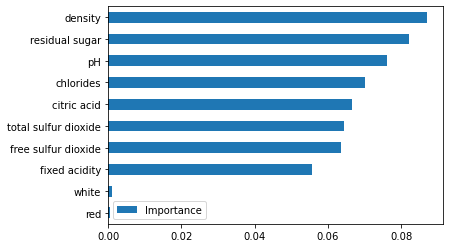

In [6]:
plot_variable_importance(X_train, y_train, save_fig_dir)

# Моделирование

Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## Выбор модели

Попробуем модель на основе метода k-ближайших соседей - KNeighborsClassifier

In [7]:
neigh = KNeighborsClassifier()

## Обучение модели KNN

In [8]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

## Оценка модели KNN

In [9]:
# Score the model
print(neigh.score(X_test, y_test))

0.4857582755966128


## Выбор альтернативной модели

Попробуем модель на основе случайного леса  - RandomForestClassifier

In [10]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, n_jobs=-1)

## Обучение модели RandomForest

In [11]:
clf_rf.fit(X_train, y_train)   

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_jobs=-1)

## Оценка модели RandomForest

In [12]:
# Score the model
print(clf_rf.score(X_test, y_test))

0.6327944572748267


## Подбор оптимальных гиперпараметров модели RandomForest

In [13]:
params = [ {'n_estimators':[50, 100], 'max_depth': list(range(5, 21))} ]

In [14]:
gs = GridSearchCV(RandomForestClassifier(), 
                  param_grid = params, 
                  scoring = 'accuracy',
                  cv=10,
                  return_train_score = False )

In [15]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                        16, 17, 18, 19, 20],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

In [16]:
best_params = gs.best_params_
best_params

{'max_depth': 17, 'n_estimators': 100}

In [17]:
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, n_jobs=-1)

In [18]:
rfc.score(X_test, y_test)

0.7051578137028484

# Выбор лучшей модели по оценке

В заключение по оценкам точности по разным моделям:

1. модель KNN с точностью 0,48
2. модель RandomForestClassifier без подбора гиперпараметров с точностью 0,63
3. модель RandomForestClassifier м подбором гиперпараметров с точностью 0,68

Лучшей по оценке можно считать модель случайного леса с подобранными параметрами и точностью оценки 0,68.

## Сохранение модели

In [32]:
path_to_save = 'D:/Netology/Python/pyda-16-em/DS Project Flow/WineQualityPrediction/models/'
joblib.dump(rfc, path_to_save + "random_forest.joblib", compress=9)

['D:/Netology/Python/pyda-16-em/DS Project Flow/WineQualityPrediction/models/random_forest.joblib']